<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB1/blob/main/6351071043_LAB1_Bai2(trang_37_38).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Yêu cầu lập trình
Cho dữ liệu Online Retail1 là lịch sử bán hàng của một cửa hàng bán lẻ trực tuyến tại Châu
Âu. Cửa hàng này chuyên bán quà tặng độc đáo vào nhiều dịp lễ trong năm và cũng có nhiều
khách hàng mua sỉ. Hãy thực hiện những yêu cầu sau:

1. Đọc dữ liệu vào chương trình


In [3]:
!pip install mlxtend xlrd

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [5]:
df = pd.read_excel("Online Retail.xlsx")

In [6]:
print("Nguyễn Thành Luân - 6351071043")
df.info()

Nguyễn Thành Luân - 6351071043
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


2. Tiền xử lý dữ liệu: cắt bỏ các ký tự thừa ở tên mặt hàng mua (cột Description), xóa các dòng dữ liệu không có số hóa đơn (cột InvoiceNo) và chuyển nó về kiểu dữ liệu chuỗi.


In [7]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [9]:
print("Nguyễn Thành Luân - 6351071043")
df.head(10)

Nguyễn Thành Luân - 6351071043


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


3. Trong dữ liệu đã cho, có một số hóa đơn là hóa đơn tín dụng thay vì là hóa đơn ghi
nợ vì vậy hãy xóa những hóa đơn đó. Chúng được xác định với ký tự ‘C’ chứa trong
số hóa đơn InvoiceNo.


In [10]:
print("Nguyễn Thành Luân - 6351071043")
df[df.InvoiceNo.str.contains('C', na=False)].head()

Nguyễn Thành Luân - 6351071043


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [11]:
df = df[~df['InvoiceNo'].str.contains('C')]

4. Thống kê số dòng dữ liệu theo từng quốc gia.


Nguyễn Thành Luân - 6351071043


<Axes: ylabel='Country'>

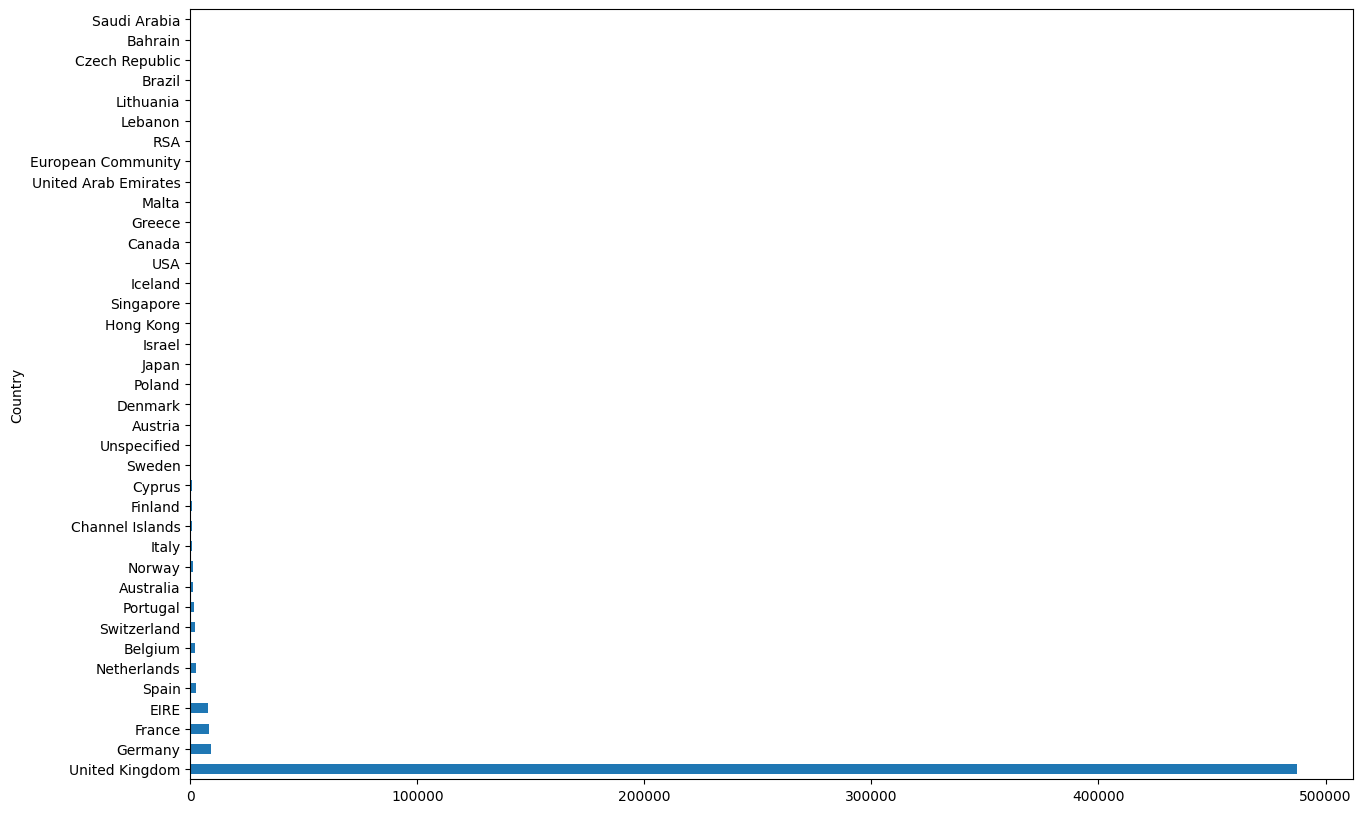

In [13]:
print("Nguyễn Thành Luân - 6351071043")
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

5. Lấy ra dữ liệu hóa đơn từ nước Anh ‘United Kingdom’ và gom nhóm cột Số lượng
mua (Quantity) theo Số hóa đơn (InvoiceNo) và Tên mặt hàng (Description).


In [16]:
print("Nguyễn Thành Luân - 6351071043")
basket = df[df['Country'] == "United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity']

Nguyễn Thành Luân - 6351071043


6. Chuyển đổi dữ liệu về dạng hot encoding, với mỗi dòng dữ liệu là một hóa đơn.


In [17]:
print("Nguyễn Thành Luân - 6351071043")
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

Nguyễn Thành Luân - 6351071043


In [19]:
print("Nguyễn Thành Luân - 6351071043")
basket.head(10)

Nguyễn Thành Luân - 6351071043


Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


7. Chuyển đổi dữ liệu từ dạng hot encoding thành one-hot encoding.


In [20]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1


In [21]:
basket = basket.applymap(encode_data)

8. Do cột ‘POSTAGE’ là tiền cước phí trên mỗi hóa đơn nên cần xóa nó đi.


In [22]:
basket.drop('POSTAGE', inplace=True, axis=1)

9. Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 3%.


In [23]:
from mlxtend.frequent_patterns import apriori

itemsets = apriori(basket,
                   min_support=0.03,
                   use_colnames=True)

itemsets.head(10)


Nguyễn Thành Luân - 6351071043


,support,itemsets
0,0.045803,(6 RIBBONS RUSTIC CHARM)
1,0.031124,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.040339,(60 TEATIME FAIRY CAKE CASES)
3,0.046928,(ALARM CLOCK BAKELIKE GREEN)
4,0.035142,(ALARM CLOCK BAKELIKE PINK)
5,0.049821,(ALARM CLOCK BAKELIKE RED)
6,0.036214,(ANTIQUE SILVER T-LIGHT GLASS)
7,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
8,0.042267,(BAKING SET 9 PIECE RETROSPOT)
9,0.035089,(BATHROOM METAL SIGN)


10. Tạo luật kết hợp với min_conf = 50% và in ra các luật này.


In [24]:
from mlxtend.frequent_patterns import association_rules
print("Nguyễn Thành Luân - 6351071043")
rules = association_rules(itemsets,
                          metric="confidence",
                          min_threshold=0.5)
rules.info()

Nguyễn Thành Luân - 6351071043
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   representativity    10 non-null     float64
 8   leverage            10 non-null     float64
 9   conviction          10 non-null     float64
 10  zhangs_metric       10 non-null     float64
 11  jaccard             10 non-null     float64
 12  certainty           10 non-null     float64
 13  kulczynski          10 non-null     float64
dtypes: float64(12), object(2)
memory usage: 1.2+ KB


In [25]:

print("Nguyễn Thành Luân - 6351071043")
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules)):
    print(
        rules.loc[i, 'antecedents'], ' ==> ', rules.loc[i, 'consequents'],
        '[', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']'
    )


Nguyễn Thành Luân - 6351071043
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED [ 0.030160175711148016 ,  0.6426940639269406 ]
ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN [ 0.030160175711148016 ,  0.6053763440860216 ]
PINK REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER [ 0.030910162318530027 ,  0.8207681365576103 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  PINK REGENCY TEACUP AND SAUCER [ 0.030910162318530027 ,  0.6177730192719486 ]
ROSES REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER [ 0.03755290084105641 ,  0.7324973876698014 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  ROSES REGENCY TEACUP AND SAUCER [ 0.03755290084105641 ,  0.7505353319057816 ]
JUMBO  BAG BAROQUE BLACK WHITE  ==>  JUMBO BAG RED RETROSPOT [ 0.03053516901483902 ,  0.6263736263736264 ]
JUMBO BAG PINK POLKADOT  ==>  JUMBO BAG RED RETROSPOT [ 0.042052820485348474 ,  0.6773080241587576 ]
JUMBO SHOPPER VINTAGE RED PAISLEY  ==>  JUMBO BAG RED RETROSPOT [ 0.03519580007499866 ,

11. Biểu diễn độ tin cậy, độ hỗ trợ của tập luật lên đồ thị phân tán (scatter plot).


Nguyễn Thành Luân - 6351071043


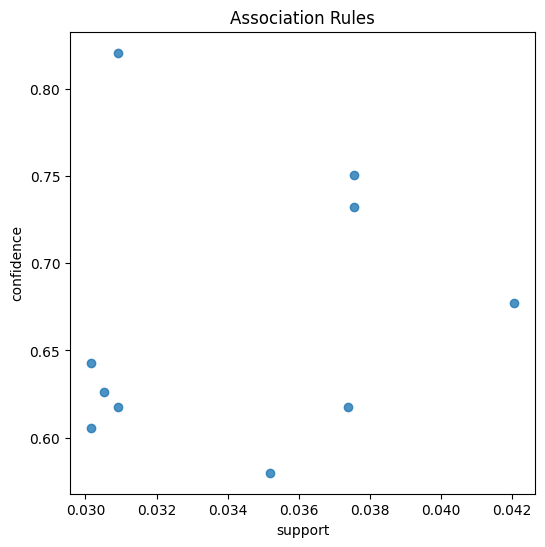

In [26]:
print("Nguyễn Thành Luân - 6351071043")
support = rules['support'].values
confidence = rules['confidence'].values

plt.figure(figsize=(6, 6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')

sns.regplot(x=support, y=confidence, fit_reg=False)
plt.show()


12. Tìm tập phổ biến và luật kết hợp bằng thuật toán FP-Growth với min_sup = 3%, min_conf = 50%. So sánh kết quả với thuật toán Apriori ở trên.

In [27]:
from mlxtend.frequent_patterns import fpgrowth
print("Nguyễn Thành Luân - 6351071043")
itemsets_fp = fpgrowth(basket, min_support=0.03, use_colnames=True)
itemsets_fp.head(10)


Nguyễn Thành Luân - 6351071043


,support,itemsets
0,0.116034,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
2,0.040071,(HOME BUILDING BLOCK WORD)
3,0.032517,(LOVE BUILDING BLOCK WORD)
4,0.030107,(DOORMAT NEW ENGLAND)
5,0.053517,(JAM MAKING SET WITH JARS)
6,0.060267,(PAPER CHAIN KIT 50'S CHRISTMAS)
7,0.057642,(WOODEN PICTURE FRAME WHITE FINISH)
8,0.050463,(WOODEN FRAME ANTIQUE WHITE)
9,0.037714,(RED HANGING HEART T-LIGHT HOLDER)
